In [1]:
%matplotlib inline

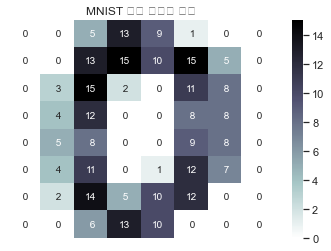

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.heatmap(digits.images[0], cmap=mpl.cm.bone_r, annot=True, fmt="2.0f",
            cbar=True, xticklabels=False, yticklabels=False)
plt.title("MNIST 숫자 이미지 표본")
plt.show()

In [6]:
digits.images[0].flatten()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()
print("Input:\n", news.data[0])
print("Output:\n", news.target_names[news.target[0]])

Input:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Output:
 rec.autos


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words="english").fit(news.data[:100])
data = vec.transform(news.data[:100])
data.shape

(100, 6288)

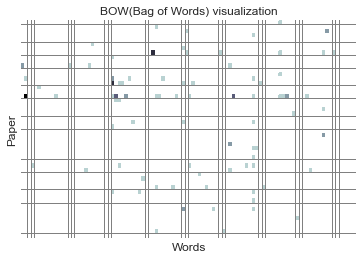

In [10]:
sns.heatmap(data.toarray()[:50, :100], cmap=mpl.cm.bone_r,
            linewidths=0.001, linecolor='gray', cbar=False,
            xticklabels=False, yticklabels=False)
plt.xlabel("Words")
plt.ylabel("Paper")
plt.title("BOW(Bag of Words) visualization")
plt.show()

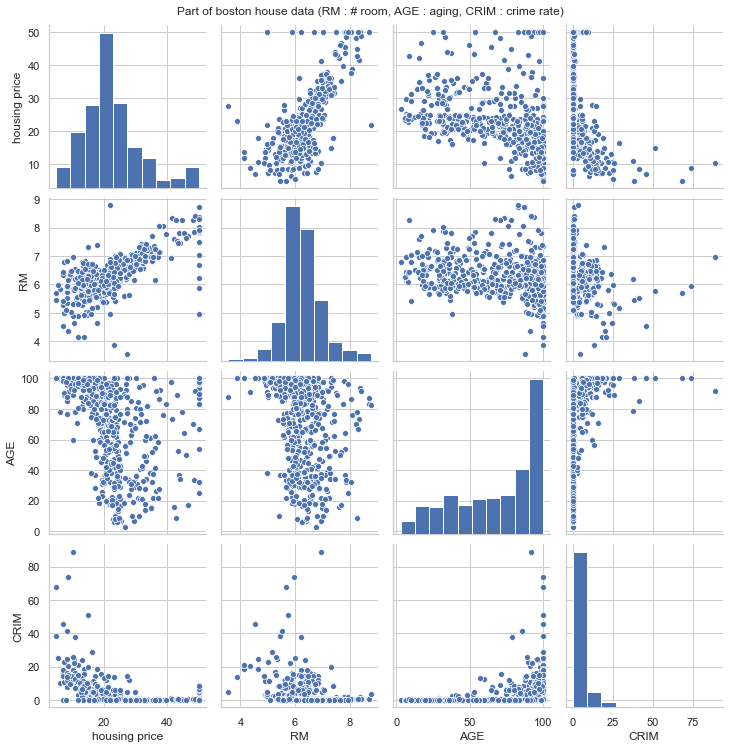

In [13]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["housing price"] = boston.target
g = sns.pairplot(df[["housing price", "RM", "AGE", "CRIM"]])
g.fig.suptitle("Part of boston house data (RM : # room, AGE : aging, CRIM : crime rate)", y = 1.02)
plt.show()

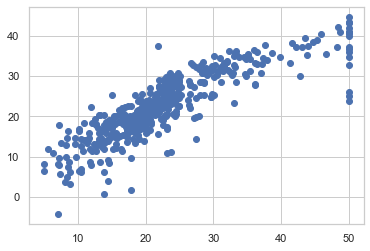

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.scatter(boston.target,predicted)
plt.show()

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = "category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

np.random.seed(0)
df.sample(frac = 1).reset_index(drop = True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

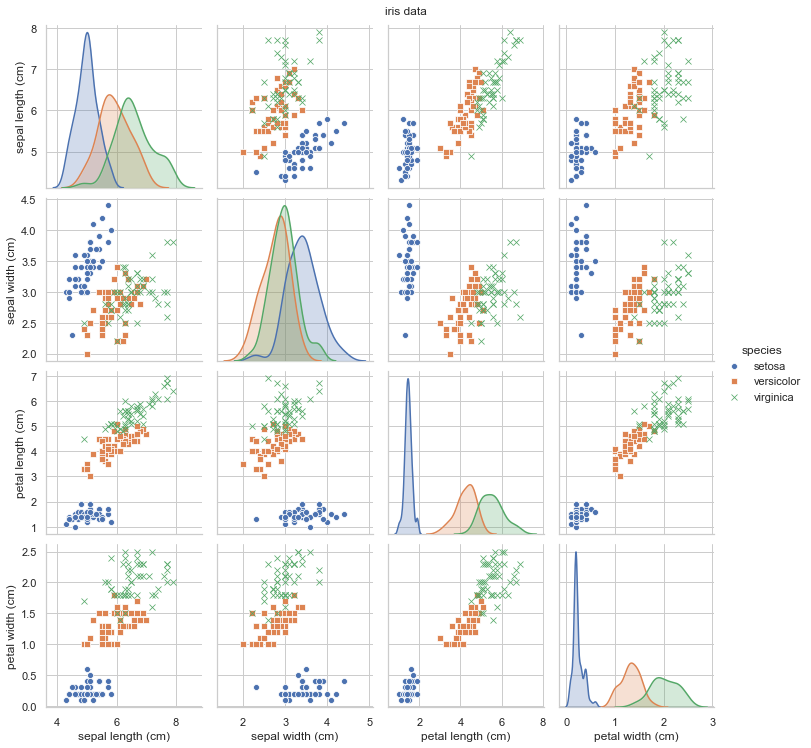

In [19]:
sns.pairplot(df, hue = "species", markers = ["o","s","x"])
plt.suptitle("iris data", y = 1.02)
plt.show()

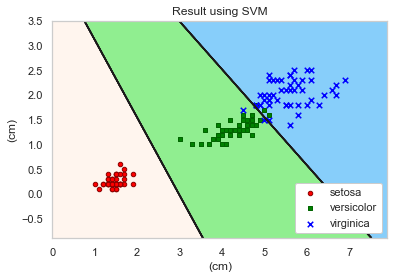

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

features = [2, 3]
X = iris.data[:, features]
y = iris.target

model = SVC(kernel="linear", random_state=0)
model.fit(X, y)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

cmap = mpl.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=20, label=iris.target_names[0],
            marker="o", edgecolors="darkred", facecolors="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=20, label=iris.target_names[1],
            marker="s", edgecolors="darkgreen", facecolors="green")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=30, label=iris.target_names[2],
            marker="x", edgecolors="darkblue", facecolors="blue")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel("(cm)")
plt.ylabel("(cm)")
plt.title("Result using SVM")
plt.legend(loc="lower right", framealpha=1)
plt.show()

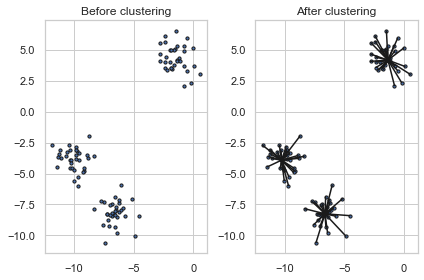

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

X,_ = make_blobs(n_features = 2, centers = 3, random_state =1)
model = AffinityPropagation().fit(X)

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],marker = 'o', s = 10, edgecolor = "k")
plt.title("Before clustering")
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],marker = 'o', s = 10, edgecolor = "k")
plt.title("After clustering")
       
for k in range(3):
    cluster_center = X[model.cluster_centers_indices_[k]]
    for x in X[model.labels_ == k]:
        plt.plot([cluster_center[0],x[0]],[cluster_center[1], x[1]], c= "k")
 
plt.tight_layout()
plt.show()

In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import statsmodels.api as sm

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install missingno

In [23]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype = {"x1" : pd.Int64Dtype()}, parse_dates = [3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [27]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [29]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

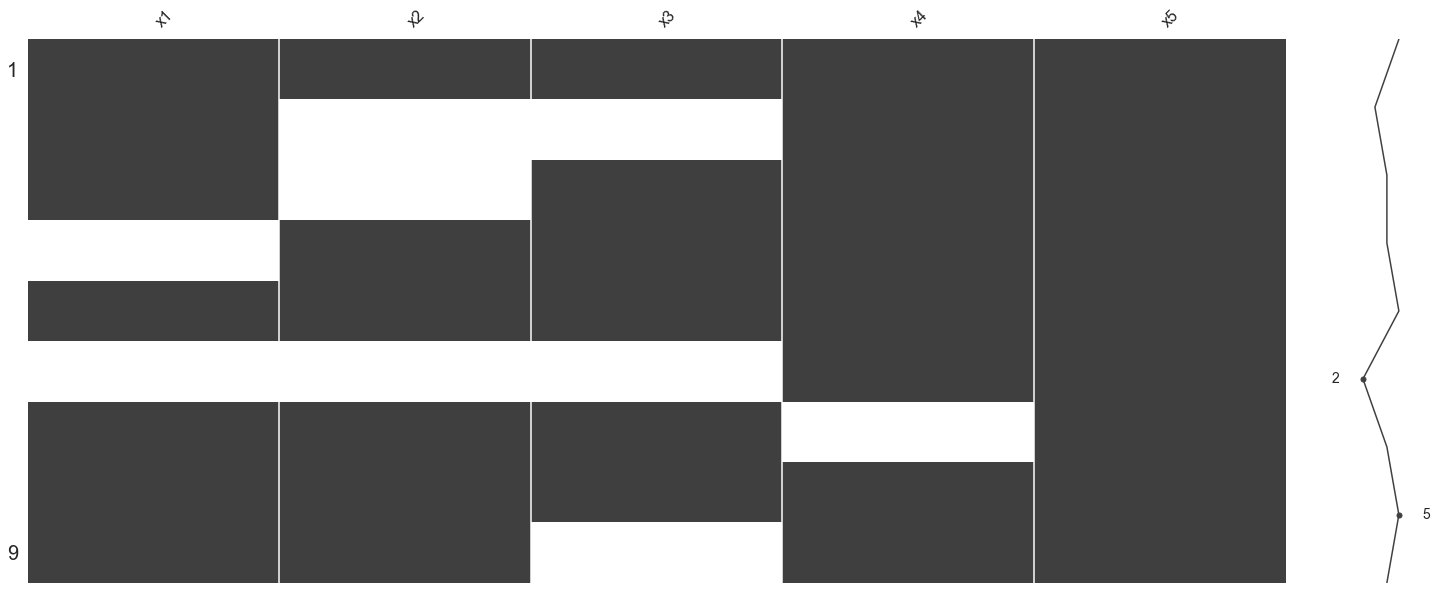

In [30]:
import missingno as msno

msno.matrix(df)
plt.show()

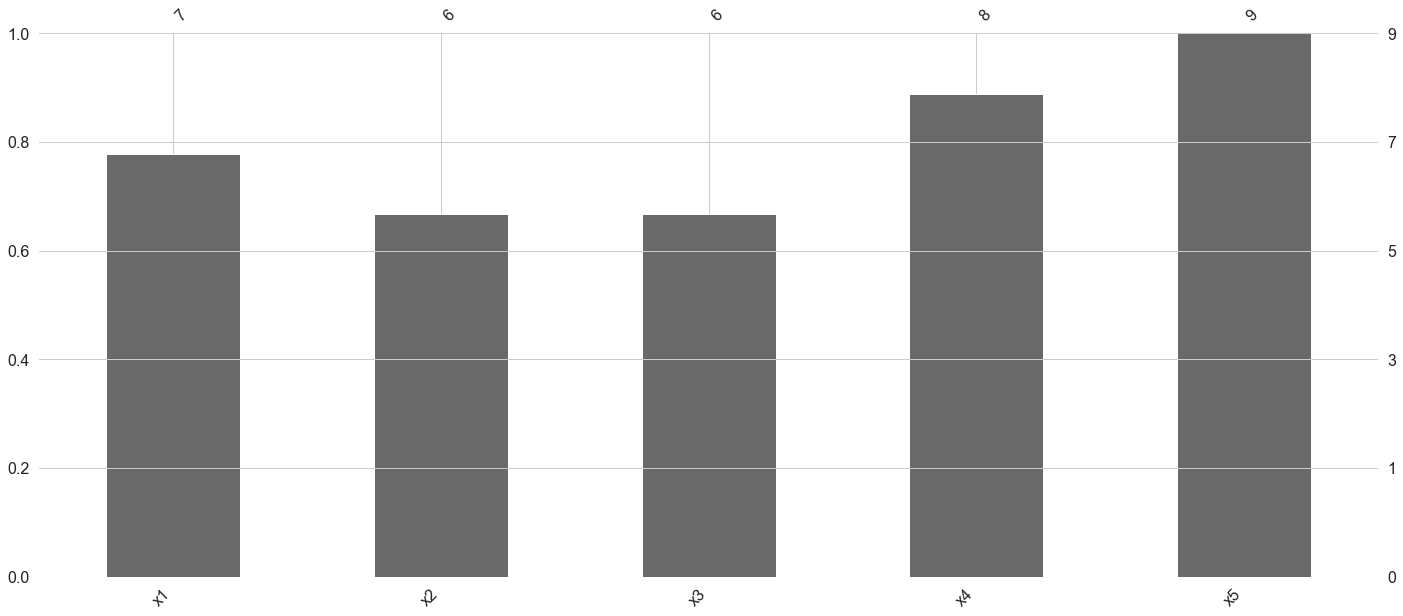

In [32]:
msno.bar(df)
plt.show()

In [33]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


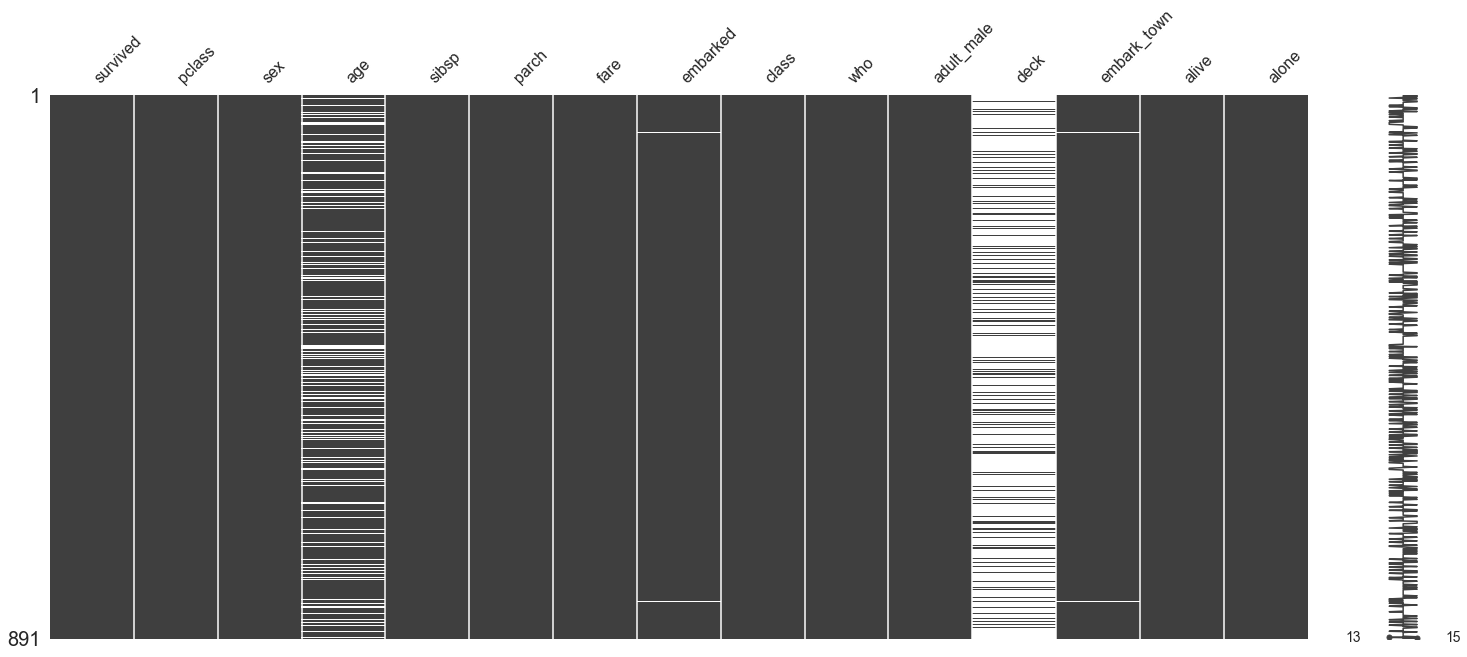

In [34]:
msno.matrix(titanic)
plt.show()

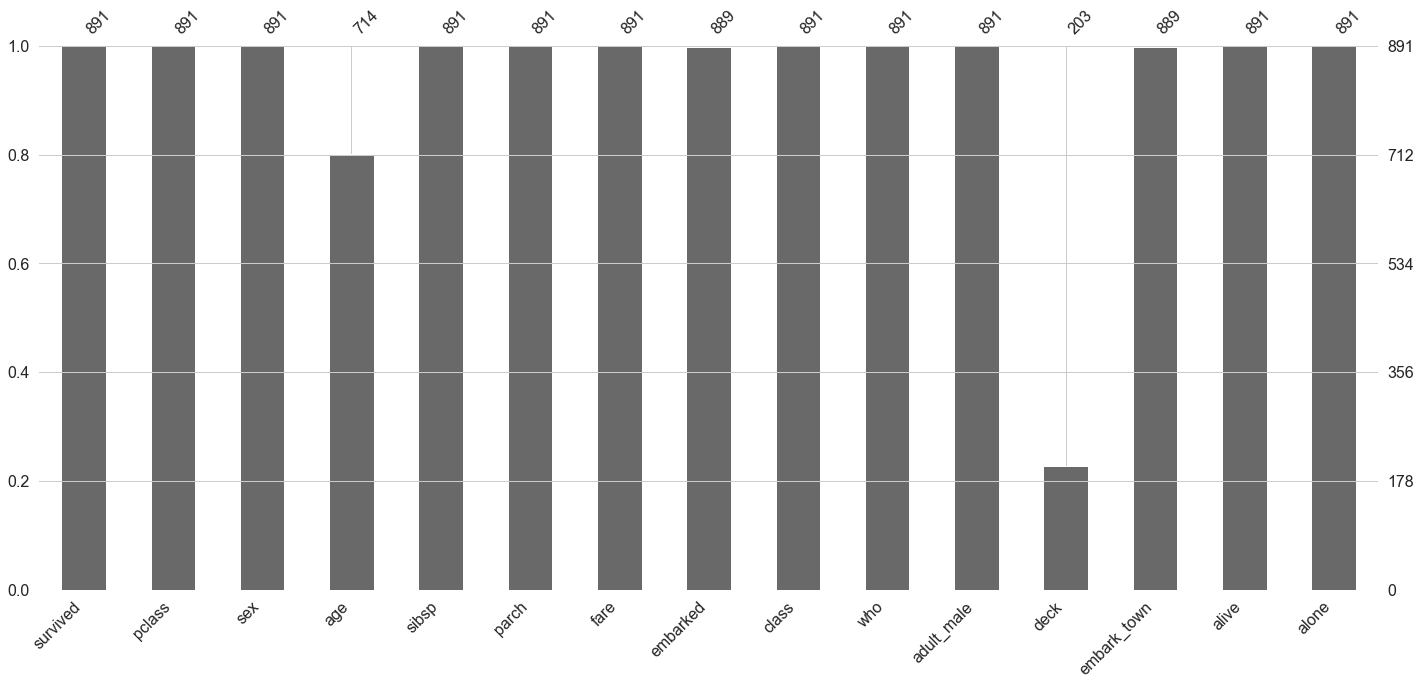

In [36]:
msno.bar(titanic)
plt.show()

In [37]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [38]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [39]:
df.dropna(axis = 1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [42]:
df.dropna(thresh = 7, axis = 1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


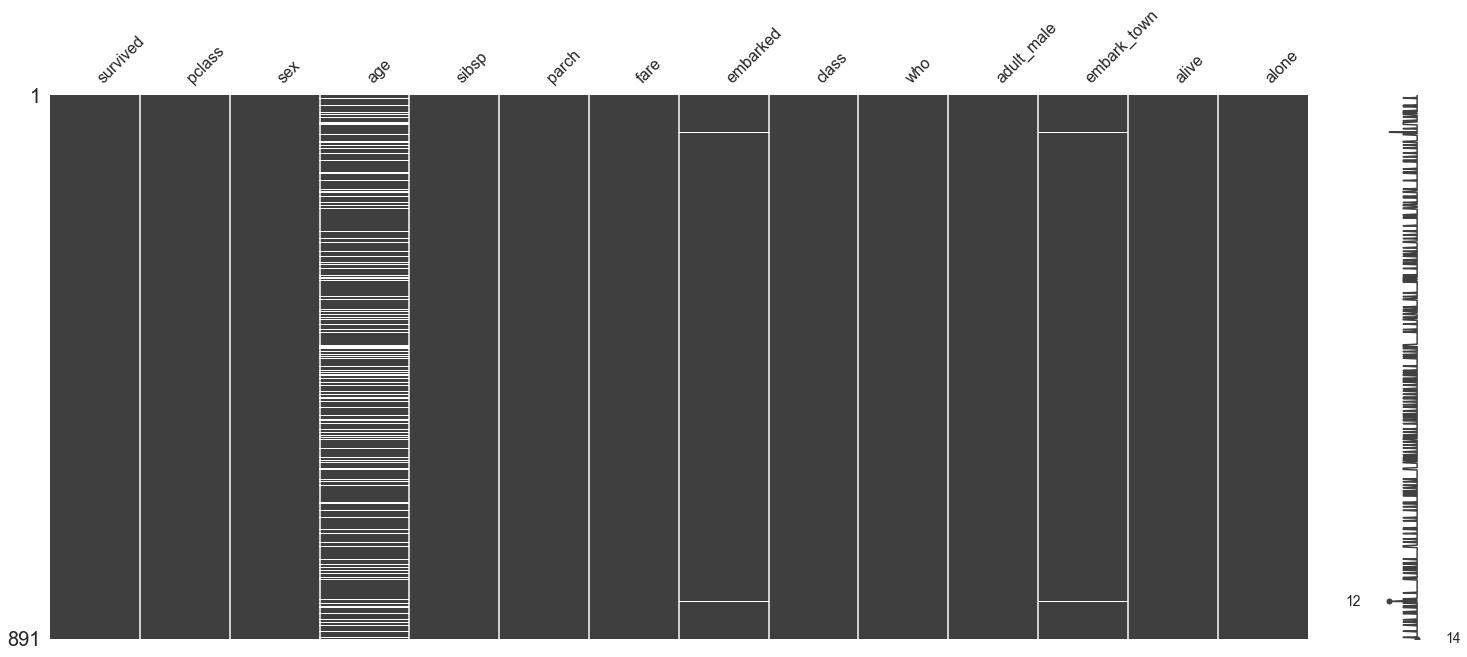

In [45]:
titanic = titanic.dropna(thresh = int(len(titanic) * 0.5), axis = 1)
msno.matrix(titanic)
plt.show()

In [46]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

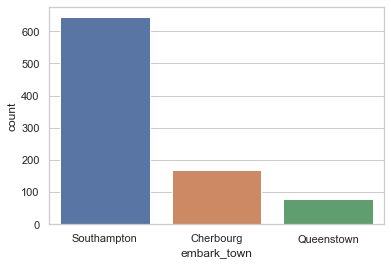

In [54]:
sns.countplot(titanic.embark_town)
plt.show()

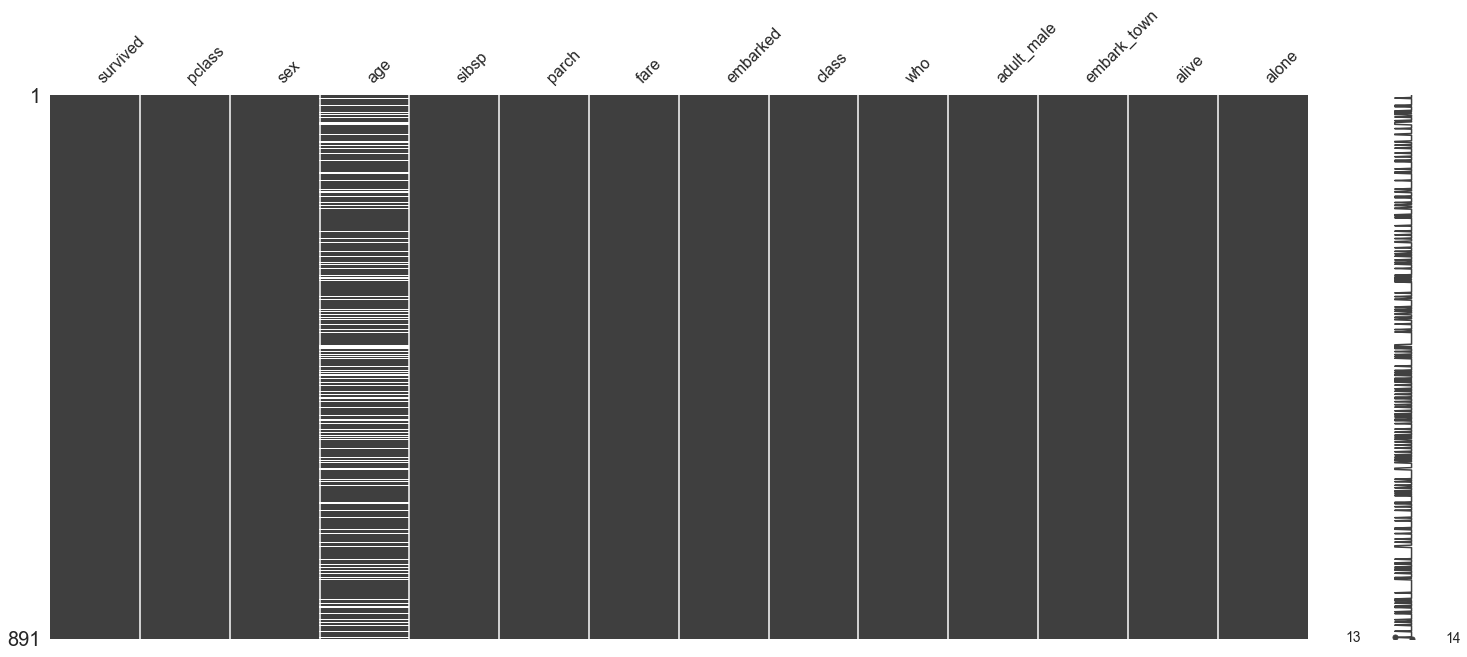

In [58]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy = "most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

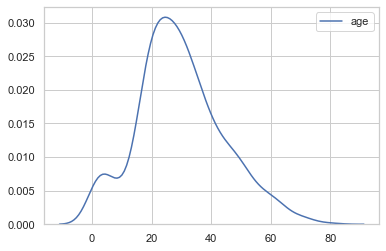

In [61]:
sns.kdeplot(titanic.age)
plt.show()

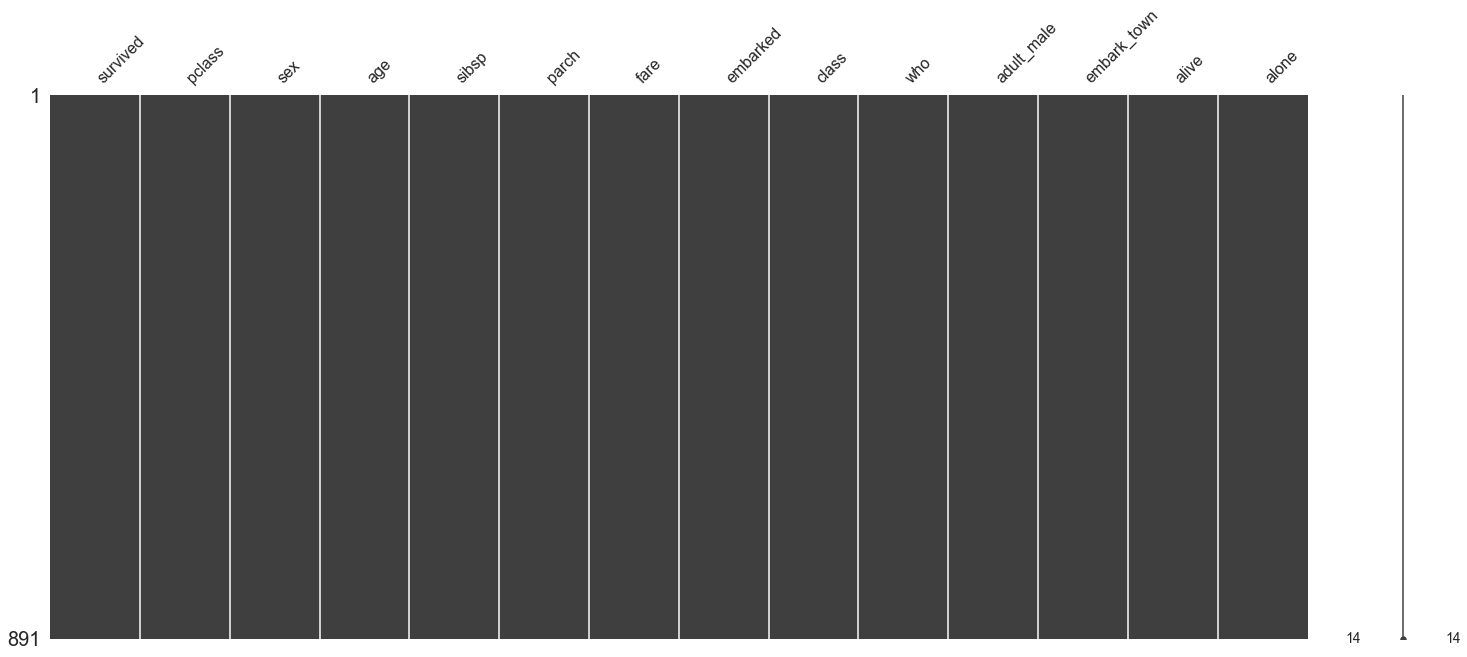

In [62]:
from sklearn.impute import SimpleImputer

imputer_age = SimpleImputer(strategy = "median")
titanic["age"] = imputer_age.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

In [64]:
from patsy import demo_data

df = pd.DataFrame(demo_data("x1","x2","x3","x4","x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [83]:
from patsy import dmatrix

dmatrix("x1 + 0", data = df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [90]:
dmatrix("x1 + x2 + x3", data = df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [91]:
dmatrix("x1 + np.log(abs(x1))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(abs(x1))
          1  1.76405          0.56761
          1  0.40016         -0.91590
          1  0.97874         -0.02149
          1  2.24089          0.80687
          1  1.86756          0.62463
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(abs(x1))' (column 2)

In [93]:
def ten_times(x) : 
    return 10 * x

dmatrix("ten_times(x1)", df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [94]:
dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [96]:
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [98]:
dmatrix("x1 + x2 + I(x1 + x2) + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

In [99]:
dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [101]:
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [103]:
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [104]:
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

In [110]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [123]:
X2 = np.vstack([X,[1000]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [124]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [126]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [133]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [129]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [136]:
X = 90 * np.arange(9).reshape(-1,1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

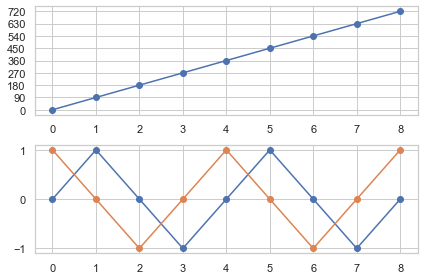

In [150]:
from sklearn.preprocessing import FunctionTransformer

def degree2sincos(x):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0,x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)
plt.subplot(211)
plt.plot(X, marker = "o")
plt.yticks(X.flatten())
plt.subplot(212)
plt.plot(X2, marker = "o")
plt.tight_layout()
plt.show()

In [155]:
df1 = pd.DataFrame(["Male","Female"], columns = ['x'])
df1

,x
0,Male
1,Female


In [156]:
from patsy import dmatrix

dmatrix("x + 0", df1)

DesignMatrix with shape (2, 2)
  x[Female]  x[Male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [157]:
df2 = pd.DataFrame(["A","B","O","AB"], columns = ["x"])
df2

,x
0,A
1,B
2,O
3,AB


In [158]:
dmatrix("x + 0", df2)

DesignMatrix with shape (4, 4)
  x[A]  x[AB]  x[B]  x[O]
     1      0     0     0
     0      0     1     0
     0      0     0     1
     0      1     0     0
  Terms:
    'x' (columns 0:4)

In [159]:
df3 = pd.DataFrame([1,2,3,4], columns = ["x"])
df3

,x
0,1
1,2
2,3
3,4


In [162]:
dmatrix("C(x) + 0", df3)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)

In [165]:
dm = dmatrix("C(x, levels = ['A', 'B', 'AB', 'O']) + 0", df2)
dm

DesignMatrix with shape (4, 4)
  Columns:
    ["C(x, levels=['A', 'B', 'AB', 'O'])[A]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[B]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[AB]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[O]"]
  Terms:
    "C(x, levels=['A', 'B', 'AB', 'O'])" (columns 0:4)
  (to view full data, use np.asarray(this_obj))

In [166]:
np.asarray(dm)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [168]:
df1

,x
0,Male
1,Female


In [173]:
dmatrix("x + 0",df1)

DesignMatrix with shape (2, 2)
  x[Female]  x[Male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [172]:
dmatrix("C(x, Treatment('Male'))", df1)

DesignMatrix with shape (2, 2)
  Intercept  C(x, Treatment('Male'))[T.Female]
          1                                  0
          1                                  1
  Terms:
    'Intercept' (column 0)
    "C(x, Treatment('Male'))" (column 1)

In [174]:
dmatrix("x",df1)

DesignMatrix with shape (2, 2)
  Intercept  x[T.Male]
          1          1
          1          0
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

In [177]:
dmatrix("x", df2)

DesignMatrix with shape (4, 4)
  Intercept  x[T.AB]  x[T.B]  x[T.O]
          1        0       0       0
          1        0       1       0
          1        0       0       1
          1        1       0       0
  Terms:
    'Intercept' (column 0)
    'x' (columns 1:4)

In [183]:
df4 = pd.DataFrame([["A","X"],["B","X"],["A","Y"],["B","Y"]], columns = ["x1", "x2"])
df4

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [186]:
dmatrix("x1 + x2", df4)

DesignMatrix with shape (4, 3)
  Intercept  x1[T.B]  x2[T.Y]
          1        0        0
          1        1        0
          1        0        1
          1        1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [188]:
dmatrix("x1:x2 + 0", df4)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

In [189]:
dmatrix("x1:x2", df4)

DesignMatrix with shape (4, 4)
  Intercept  x2[T.Y]  x1[T.B]:x2[X]  x1[T.B]:x2[Y]
          1        0              0              0
          1        0              1              0
          1        1              0              0
          1        1              0              1
  Terms:
    'Intercept' (column 0)
    'x1:x2' (columns 1:4)

In [191]:
import nltk
nltk.download("book", quiet = True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [192]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [254]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [255]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [256]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [280]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [281]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print("Porter Stemmer     :", [st1.stem(w) for w in words])
print("Lancasters Stemmer :", [st2.stem(w) for w in words])

Porter Stemmer     : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancasters Stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


In [282]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos = 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [283]:
nltk.help.upenn_tagset("NNP")

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [284]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [261]:
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list

['refuse', 'permit']

In [262]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [285]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [286]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))
text

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

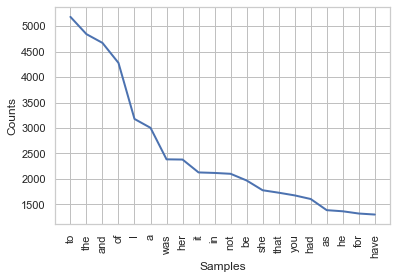

In [287]:
text.plot(20)
plt.show()

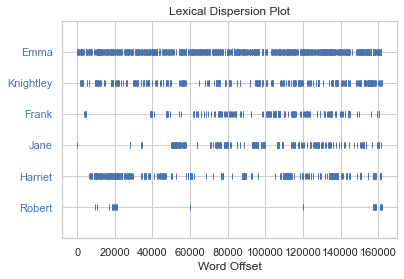

In [288]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [289]:
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [290]:
text

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

In [291]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [292]:
text.common_contexts(["Emma", "she"])

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [293]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [294]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [295]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [296]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

In [297]:
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

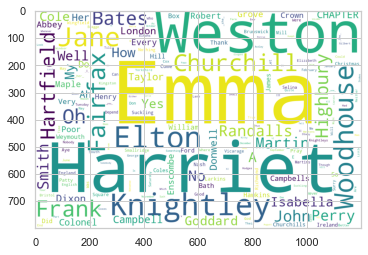

In [305]:
from wordcloud import WordCloud

wc = WordCloud(width = 1200, height = 800, background_color = "white", random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()

In [300]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

ModuleNotFoundError: No module named 'konlpy'

In [4]:
pip install konlpy

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [6]:
v.feature_names_

['A', 'B', 'C']

In [8]:
v.transform({'C' : 4, 'D' : 3})

array([[0., 0., 4.]])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [12]:
vect.transform(['This is the second documnet.']).toarray()

array([[0, 0, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [15]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [24]:
vect = CountVectorizer(stop_words = ["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [25]:
vect = CountVectorizer(stop_words = "english").fit(corpus)
vect.vocabulary_
#english는  nltk가 미리 지정한 불용어 리스트 리턴

{'document': 0, 'second': 1}

In [27]:
from nltk.corpus import stopwords 
stopwords.words('english')[:10]  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
vect = CountVectorizer(analyzer = "char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [32]:
vect = CountVectorizer(token_pattern = "f\w+").fit(corpus)
vect.vocabulary_

{'first': 0}

In [36]:
import nltk

vect = CountVectorizer(tokenizer = nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

In [39]:
vect = CountVectorizer(ngram_range = (2,2)).fit(corpus)
vect.vocabulary_
#단어의 의미를 2부터 2까지 잡는다. 즉,  very보다는 very good이 의미가 살아남

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [47]:
vect = CountVectorizer(ngram_range = (1,2), token_pattern = "t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

In [53]:
vect = CountVectorizer(max_df = 4, min_df = 2).fit(corpus)
vect.vocabulary_

{'this': 3, 'is': 2, 'first': 1, 'document': 0}

In [54]:
vect.transform(corpus).toarray().sum(axis = 0)

array([4, 2, 3, 3], dtype=int64)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [60]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [62]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

Wall time: 13.3 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [64]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features = 300000)

In [65]:
%time hv.transform(twenty.data)

Wall time: 5.64 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>